# Mikhail Karimov NIE-PML
 Team Performance Prediction using PML: this project target it to develop a machine learning model to predict the outcome of sports events by analyzing historical data of two competing teams. The system will use features such as player statistics, team performance trends, and game conditions to forecast the likelihood of victory for a specific team in upcoming matches.
 
 1. Collaborative Filtering Method
 2. Content based Method
 3. Combination of both



In [181]:
# Constant definition
RANDOM_SEED = 67

## Collaborative Filtering (CBF)
First I have imported based game history dataset from ./new data/games.csv. Then I have created a pivot table (matrix) where rows are home teams, columns are away teams, and values are PTS_home

In [182]:
import pandas as pd

# Load the dataset
games_data = pd.read_csv('./new data/games.csv')

# Preparing Data: Ensure relevant columns exist
# Assumes 'team_home', 'team_away', and 'PTS_home' exist in the dataset
games_data = games_data.dropna(subset=['TEAM_ID_home', 'TEAM_ID_away', 'PTS_home'])
games_data = games_data[games_data['SEASON'].between(2010, 2019)]

# Create a pivot table (matrix) where rows are home teams, columns are away teams, and values are PTS_home
CF_matrix = games_data.pivot_table(index='TEAM_ID_home', columns='TEAM_ID_away', values='PTS_home').fillna(0)
CF_matrix

TEAM_ID_away,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
TEAM_ID_home,,,,,,,,,,,,,,,,,,,,,
1610612737,0.000000,99.083333,107.400000,99.769231,98.047619,104.500000,104.666667,102.900000,104.444444,104.000000,...,100.000000,115.000000,99.750000,104.666667,99.000000,106.400000,96.571429,107.120000,102.450000,106.809524
1610612738,103.956522,0.000000,102.928571,105.111111,102.300000,101.000000,109.777778,102.111111,101.200000,113.444444,...,103.900000,110.000000,98.000000,100.000000,101.703704,97.400000,103.500000,110.227273,104.055556,103.857143
1610612739,108.583333,104.259259,0.000000,98.200000,96.680000,100.583333,106.888889,103.250000,108.800000,103.400000,...,114.000000,104.888889,102.636364,102.222222,107.640000,102.100000,100.900000,99.952381,102.720000,103.052632
1610612740,98.166667,102.500000,117.777778,0.000000,99.909091,104.545455,107.052632,106.600000,103.909091,106.111111,...,106.900000,107.833333,104.200000,104.631579,98.818182,102.904762,100.772727,96.666667,102.777778,102.700000
1610612741,98.391304,97.190476,101.125000,107.000000,0.000000,98.833333,103.166667,105.555556,102.500000,95.444444,...,99.400000,103.100000,97.666667,98.000000,101.333333,96.300000,98.916667,99.375000,100.363636,98.526316
1610612742,102.727273,102.800000,107.100000,105.714286,105.454545,0.000000,103.000000,109.647059,106.840000,106.772727,...,106.652174,108.666667,98.695652,104.111111,99.600000,109.294118,100.500000,107.090909,98.500000,102.538462
1610612743,111.500000,105.300000,108.200000,109.941176,113.333333,107.421053,0.000000,110.000000,111.000000,108.217391,...,108.037037,111.666667,104.000000,107.565217,110.400000,103.833333,101.937500,107.100000,109.200000,106.111111
1610612744,103.250000,100.600000,109.350000,110.500000,113.000000,110.263158,111.250000,0.000000,112.000000,116.068966,...,112.962963,107.076923,107.520000,109.809524,112.769231,103.666667,104.750000,113.555556,110.222222,108.444444
1610612745,116.000000,111.200000,109.111111,109.416667,106.875000,108.083333,112.894737,107.166667,0.000000,106.952381,...,108.000000,114.117647,103.571429,109.068966,109.300000,108.458333,107.782609,110.777778,106.700000,108.200000


In [183]:
# Calculate PTS_home statistics
pts_home_min = games_data['PTS_home'].min()
pts_home_max = games_data['PTS_home'].max()
pts_home_mean = games_data['PTS_home'].mean()

pts_home_min, pts_home_max, pts_home_mean

(59.0, 161.0, 104.29626092705502)

In [184]:
games_data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3180,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
3181,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
3182,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
3183,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
3184,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [185]:
# Duplicate each row by the value in the 'SEASON' column
games_data_weighted = games_data.loc[games_data.index.repeat(games_data['SEASON'] - 2010)]
CF_matrix_weighted = games_data_weighted.pivot_table(index='TEAM_ID_home', columns='TEAM_ID_away', values='PTS_home').fillna(0)
CF_matrix_weighted

TEAM_ID_away,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
TEAM_ID_home,,,,,,,,,,,,,,,,,,,,,
1610612737,0.000000,104.968421,108.542169,105.343750,106.935065,105.944444,108.090909,106.155556,106.568182,104.488889,...,105.288889,115.227273,104.116667,110.500000,101.166667,105.933333,97.850000,110.396396,102.786517,112.023256
1610612738,108.277228,0.000000,104.619355,114.568182,105.681818,104.022222,110.159091,104.136364,103.377778,118.977273,...,107.133333,110.613636,100.466667,103.888889,103.728000,95.777778,110.911111,113.441176,107.839506,108.219048
1610612739,113.293103,107.615942,0.000000,102.222222,100.690265,103.462963,107.750000,105.653061,107.577778,102.622222,...,115.545455,107.527778,106.311111,104.977273,110.504065,103.844444,105.081633,105.223529,106.482143,104.404762
1610612740,105.454545,107.688889,121.613636,0.000000,109.288462,109.940000,111.144444,109.744898,107.584158,111.658824,...,113.282609,112.281690,110.166667,110.613636,103.528302,109.617647,107.989011,102.538462,104.022727,109.736842
1610612741,104.450000,98.553191,102.871560,111.581081,0.000000,101.380000,103.431373,104.886364,99.533333,97.704545,...,101.200000,96.555556,97.659091,100.739130,100.357895,93.000000,103.280000,105.420000,104.469388,100.741176
1610612742,104.634615,106.088889,115.500000,109.606383,113.196078,0.000000,106.313253,112.864865,106.603960,108.914530,...,112.468085,108.604651,99.282828,106.108911,103.200000,110.277778,101.763441,109.666667,100.571429,103.836066
1610612743,114.622222,107.733333,108.711111,113.631579,116.375000,108.011765,0.000000,109.285714,112.187500,110.252336,...,109.923077,114.128205,105.146789,109.153846,113.022222,105.222222,102.102941,104.735849,105.977778,106.272727
1610612744,107.714286,100.600000,110.929293,115.517241,120.266667,111.943182,113.760000,0.000000,112.545455,119.451128,...,116.811475,108.156522,112.226415,109.571429,108.684932,106.223404,108.505618,118.431818,112.022727,108.931818
1610612745,122.022222,117.283019,114.400000,114.584906,112.485714,110.330275,117.717647,107.894737,0.000000,108.978022,...,108.750000,116.291667,104.024590,111.921986,111.933333,109.804878,112.792079,116.555556,110.000000,112.933333


In [186]:
#CF_matrix = CF_matrix_weighted
#CF_matrix

In [187]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(RANDOM_SEED)

# Randomly select indices to set as NaN
random_indices = np.random.choice(CF_matrix.size, size=int(CF_matrix.size * 0.2), replace=False)
matrix_flat = CF_matrix.values.flatten()
matrix_flat[random_indices] = np.nan

# Reshape back into original matrix shape with NaNs
matrix = pd.DataFrame(matrix_flat.reshape(CF_matrix.shape), index=CF_matrix.index, columns=CF_matrix.columns)
matrix

TEAM_ID_away,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
TEAM_ID_home,,,,,,,,,,,,,,,,,,,,,
1610612737,0.000000,99.083333,107.400000,99.769231,98.047619,104.500000,104.666667,102.900000,104.444444,104.000000,...,NaN,115.000000,99.750000,104.666667,99.000000,106.400000,96.571429,NaN,102.450000,NaN
1610612738,NaN,0.000000,102.928571,105.111111,102.300000,101.000000,109.777778,NaN,101.200000,113.444444,...,NaN,110.000000,98.000000,100.000000,101.703704,97.400000,NaN,NaN,NaN,103.857143
1610612739,NaN,104.259259,NaN,98.200000,96.680000,100.583333,NaN,103.250000,108.800000,103.400000,...,114.000000,104.888889,NaN,102.222222,107.640000,102.100000,100.900000,99.952381,102.720000,103.052632
1610612740,98.166667,NaN,117.777778,0.000000,99.909091,104.545455,NaN,106.600000,103.909091,106.111111,...,106.900000,107.833333,104.200000,104.631579,NaN,102.904762,100.772727,96.666667,102.777778,102.700000
1610612741,98.391304,97.190476,101.125000,107.000000,0.000000,98.833333,NaN,NaN,102.500000,NaN,...,99.400000,103.100000,97.666667,98.000000,101.333333,NaN,NaN,99.375000,100.363636,98.526316
1610612742,102.727273,102.800000,107.100000,105.714286,NaN,0.000000,103.000000,NaN,106.840000,106.772727,...,NaN,108.666667,NaN,NaN,NaN,109.294118,100.500000,107.090909,98.500000,102.538462
1610612743,111.500000,105.300000,108.200000,109.941176,113.333333,107.421053,0.000000,110.000000,111.000000,108.217391,...,108.037037,111.666667,NaN,107.565217,110.400000,103.833333,101.937500,107.100000,109.200000,106.111111
1610612744,103.250000,NaN,109.350000,110.500000,113.000000,110.263158,111.250000,NaN,112.000000,NaN,...,NaN,107.076923,NaN,109.809524,NaN,103.666667,104.750000,113.555556,110.222222,108.444444
1610612745,NaN,NaN,109.111111,109.416667,106.875000,NaN,112.894737,107.166667,0.000000,106.952381,...,108.000000,114.117647,NaN,109.068966,109.300000,108.458333,NaN,110.777778,NaN,108.200000


In [188]:
# Replace NaN with 0, or use other imputations (e.g., mean)
matrix_temp = matrix.fillna(0)

from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Perform SVD with a low-rank approximation
svd = TruncatedSVD(n_components=5, random_state=RANDOM_SEED)  # 3 latent factors
P = svd.fit_transform(matrix_temp)  # Latent embeddings for home teams
Q = svd.components_.T  # Latent embeddings for away teams

# Reconstruct the matrix
reconstructed_matrix = P @ Q.T
np.fill_diagonal(reconstructed_matrix, 0)
reconstructed_matrix = pd.DataFrame(reconstructed_matrix, index=matrix_temp.index, columns=matrix_temp.columns)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, None)
reconstructed_matrix

TEAM_ID_away,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
TEAM_ID_home,,,,,,,,,,,,,,,,,,,,,
1610612737,0.000000,94.688375,85.486753,50.863267,64.952850,76.316789,69.211759,117.472334,81.224369,117.098999,...,104.831092,92.635263,107.169382,83.894260,53.623156,93.421595,74.389239,56.942501,61.388182,34.857246
1610612738,54.790708,0.000000,84.102496,74.522917,83.530748,80.721757,77.367104,94.223566,68.070128,82.353198,...,55.370995,83.070040,48.416305,114.635495,80.765225,93.711888,48.441313,75.013461,46.932039,98.031599
1610612739,84.291507,71.178620,0.000000,99.890801,98.505773,91.989313,39.498930,66.501563,80.494236,58.672621,...,70.889879,52.050758,80.610269,81.755776,105.685067,58.787944,74.254982,92.660670,73.984652,89.782592
1610612740,69.291378,57.144262,94.506833,0.000000,67.709490,90.144488,95.043111,103.360277,83.382586,101.296339,...,90.124026,108.936341,83.827425,101.171601,44.027576,96.010781,69.717294,77.358232,77.625097,47.027875
1610612741,86.091978,50.139566,49.958494,95.785840,0.000000,97.452958,60.352230,41.214105,83.552451,40.617971,...,62.956109,65.872265,64.676522,77.403178,76.332896,49.989547,74.940539,107.752003,97.876560,73.951731
1610612742,96.371312,101.976769,136.964168,84.773266,21.948978,0.000000,103.349557,0.000000,129.745383,112.571856,...,48.786604,98.860702,0.000000,24.681067,9.208117,85.916422,93.861991,103.805651,91.820711,58.740628
1610612743,99.566759,85.216863,102.049999,123.287826,110.031488,78.236648,0.000000,88.025621,112.253388,108.235316,...,76.922428,84.573112,65.346961,109.823384,121.874258,104.413626,89.050498,112.103604,75.215368,131.673911
1610612744,88.410571,14.631934,77.141856,94.080578,72.323454,99.506569,107.508909,0.000000,95.634982,33.402230,...,49.792071,100.617615,30.529465,86.455644,36.641897,57.569719,75.785707,133.209903,127.650397,67.921983
1610612745,43.937398,10.409968,89.672181,78.118782,79.460554,51.437756,69.217099,83.790009,0.000000,83.771196,...,31.832752,69.378254,15.784536,111.082504,90.612081,97.192872,35.868613,66.091728,21.199806,122.636735


In [189]:
CF_matrix_reconstructed = matrix.fillna(pd.DataFrame(reconstructed_matrix, index=matrix.index, columns=matrix.columns))
CF_matrix_reconstructed

TEAM_ID_away,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
TEAM_ID_home,,,,,,,,,,,,,,,,,,,,,
1610612737,0.000000,99.083333,107.400000,99.769231,98.047619,104.500000,104.666667,102.900000,104.444444,104.000000,...,104.831092,115.000000,99.750000,104.666667,99.000000,106.400000,96.571429,56.942501,102.450000,34.857246
1610612738,54.790708,0.000000,102.928571,105.111111,102.300000,101.000000,109.777778,94.223566,101.200000,113.444444,...,55.370995,110.000000,98.000000,100.000000,101.703704,97.400000,48.441313,75.013461,46.932039,103.857143
1610612739,84.291507,104.259259,0.000000,98.200000,96.680000,100.583333,39.498930,103.250000,108.800000,103.400000,...,114.000000,104.888889,80.610269,102.222222,107.640000,102.100000,100.900000,99.952381,102.720000,103.052632
1610612740,98.166667,57.144262,117.777778,0.000000,99.909091,104.545455,95.043111,106.600000,103.909091,106.111111,...,106.900000,107.833333,104.200000,104.631579,44.027576,102.904762,100.772727,96.666667,102.777778,102.700000
1610612741,98.391304,97.190476,101.125000,107.000000,0.000000,98.833333,60.352230,41.214105,102.500000,40.617971,...,99.400000,103.100000,97.666667,98.000000,101.333333,49.989547,74.940539,99.375000,100.363636,98.526316
1610612742,102.727273,102.800000,107.100000,105.714286,21.948978,0.000000,103.000000,0.000000,106.840000,106.772727,...,48.786604,108.666667,0.000000,24.681067,9.208117,109.294118,100.500000,107.090909,98.500000,102.538462
1610612743,111.500000,105.300000,108.200000,109.941176,113.333333,107.421053,0.000000,110.000000,111.000000,108.217391,...,108.037037,111.666667,65.346961,107.565217,110.400000,103.833333,101.937500,107.100000,109.200000,106.111111
1610612744,103.250000,14.631934,109.350000,110.500000,113.000000,110.263158,111.250000,0.000000,112.000000,33.402230,...,49.792071,107.076923,30.529465,109.809524,36.641897,103.666667,104.750000,113.555556,110.222222,108.444444
1610612745,43.937398,10.409968,109.111111,109.416667,106.875000,51.437756,112.894737,107.166667,0.000000,106.952381,...,108.000000,114.117647,15.784536,109.068966,109.300000,108.458333,35.868613,110.777778,21.199806,108.200000


In [190]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming matrix and reconstructed_matrix are defined and have same shape
mse = mean_squared_error(CF_matrix_reconstructed.values.flatten(), CF_matrix.values.flatten())
mean_target = np.mean(CF_matrix.values)
relative_rmse = np.sqrt(mse) / mean_target

error_df = pd.DataFrame({'MSE': [mse], 'Mean Target': [mean_target], 'Relative RMSE': [relative_rmse]}, index=['CF'])
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887


## Content-Based Filtering (CBF)
First I have imported data for each team from original dataset of teams and expanded it to include more features for prediction.

In [191]:
# Load the datasets
team_summaries_df = pd.read_csv('./data/Team Summaries.csv')
team_summaries_df = team_summaries_df[team_summaries_df['season'] == 2018]

teams_df = pd.read_csv('./new data/teams.csv')

games_df = pd.read_csv('./new data/games.csv')
games_df = games_df[games_df['SEASON'] == 2019]
print(games_df.shape)

team_stats_per_game_df = pd.read_csv('./data/Team Stats Per Game.csv')
team_stats_per_game_df = team_stats_per_game_df[team_stats_per_game_df['season'] == 2018]

# Merging the datasets
merged_df = team_summaries_df.merge(teams_df, how='inner', left_on='abbreviation', right_on='ABBREVIATION')
stats_df = team_stats_per_game_df.merge(merged_df, how='inner', left_on='abbreviation', right_on='ABBREVIATION')

cb_data_full = games_df.merge(stats_df.add_suffix('_H'), how='left', left_on='TEAM_ID_home', right_on='TEAM_ID_H')
cb_data_full = cb_data_full.merge(stats_df.add_suffix('_A'), how='left', left_on='TEAM_ID_away', right_on='TEAM_ID_A')

cb_data_full

(1241, 21)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,ABBREVIATION_A,NICKNAME_A,YEARFOUNDED_A,CITY_A,ARENA_A,ARENACAPACITY_A,OWNER_A,GENERALMANAGER_A,HEADCOACH_A,DLEAGUEAFFILIATION_A
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,MIA,Heat,1988.0,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,MIA,Heat,1988.0,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,2019-10-05,11900005,Final,1610612754,1610612758,2019,1610612754,130.0,0.521,0.944,...,SAC,Kings,1948.0,Sacramento,Golden 1 Center,17500.0,Vivek Ranadive,Vlade Divac,Luke Walton,Stockton Kings
1237,2019-10-05,11900006,Final,1610612744,1610612747,2019,1610612744,101.0,0.393,0.769,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
1238,2019-10-05,11900007,Final,1610612759,1610612753,2019,1610612759,89.0,0.388,0.750,...,ORL,Magic,1989.0,Orlando,Amway Center,0.0,Rick DeVos,John Hammond,Steve Clifford,Lakeland Magic
1239,2019-10-04,11900002,Final,1610612746,1610612745,2019,1610612746,96.0,0.384,0.600,...,HOU,Rockets,1967.0,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers


In [192]:
cb_dataset = cb_data_full.dropna()

In [193]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selecting features (dropping target column and non-numeric columns)
X = cb_dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['PTS_home'], errors='ignore')
y = cb_dataset['PTS_home']

# Selecting top features
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Getting feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)

# Top features based on scores
top_features = feature_scores.head(30)
print(top_features)

                Feature       Score
5           FG_PCT_home  884.525897
7          FG3_PCT_home  402.665067
8              AST_home  301.697921
17       HOME_TEAM_WINS  242.209847
11             PTS_away  121.828831
16             REB_away   98.163768
6           FT_PCT_home   32.906147
88         ft_percent_A   22.726473
99                age_A   13.743806
15             AST_away   13.409810
9              REB_home   11.151721
55               f_tr_H    9.646999
76        mp_per_game_A    9.432316
61             ft_fga_H    9.386248
118  opp_e_fg_percent_A    9.121204
108             d_rtg_A    8.563282
73      ARENACAPACITY_H    8.028923
123          attend_g_A    8.004298
91       trb_per_game_A    7.902377
105               sos_A    7.830954
122            attend_A    7.795801
31       fta_per_game_H    7.655138
50                srs_H    7.574494
30        ft_per_game_H    7.523627
36       ast_per_game_H    7.348700
48                mov_H    7.094385
53              n_rtg_H    7

C:\Users\mikev\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [194]:
cb_data_full

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,ABBREVIATION_A,NICKNAME_A,YEARFOUNDED_A,CITY_A,ARENA_A,ARENACAPACITY_A,OWNER_A,GENERALMANAGER_A,HEADCOACH_A,DLEAGUEAFFILIATION_A
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,MIA,Heat,1988.0,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,MIA,Heat,1988.0,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,2019-10-05,11900005,Final,1610612754,1610612758,2019,1610612754,130.0,0.521,0.944,...,SAC,Kings,1948.0,Sacramento,Golden 1 Center,17500.0,Vivek Ranadive,Vlade Divac,Luke Walton,Stockton Kings
1237,2019-10-05,11900006,Final,1610612744,1610612747,2019,1610612744,101.0,0.393,0.769,...,LAL,Lakers,1948.0,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
1238,2019-10-05,11900007,Final,1610612759,1610612753,2019,1610612759,89.0,0.388,0.750,...,ORL,Magic,1989.0,Orlando,Amway Center,0.0,Rick DeVos,John Hammond,Steve Clifford,Lakeland Magic
1239,2019-10-04,11900002,Final,1610612746,1610612745,2019,1610612746,96.0,0.384,0.600,...,HOU,Rockets,1967.0,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers


In [195]:
cb_dataset = cb_data_full[['TEAM_ID_home', 'TEAM_ID_away', 'ABBREVIATION_H', 'ABBREVIATION_A', 'PTS_home', 'PTS_away', 'ft_percent_H', 'ft_percent_A', 'age_H', 'age_A', 'f_tr_H', 'f_tr_A', 'ft_fga_H', 'ft_fga_A', 'opp_e_fg_percent_H', 'opp_e_fg_percent_A', 'd_rtg_H', 'd_rtg_A', 'trb_per_game_H', 'trb_per_game_A', 'mov_H', 'mov_A']]
cb_dataset

,TEAM_ID_home,TEAM_ID_away,ABBREVIATION_H,ABBREVIATION_A,PTS_home,PTS_away,ft_percent_H,ft_percent_A,age_H,age_A,...,ft_fga_H,ft_fga_A,opp_e_fg_percent_H,opp_e_fg_percent_A,d_rtg_H,d_rtg_A,trb_per_game_H,trb_per_game_A,mov_H,mov_A
0,1610612748,1610612747,MIA,LAL,93.0,106.0,0.755,0.714,26.5,23.7,...,0.173,0.188,0.507,0.514,106.3,108.0,43.5,46.4,0.48,-1.55
1,1610612747,1610612748,LAL,MIA,108.0,111.0,0.714,0.755,23.7,26.5,...,0.188,0.173,0.514,0.507,108.0,106.3,46.4,43.5,-1.55,0.48
2,1610612748,1610612747,MIA,LAL,96.0,102.0,0.755,0.714,26.5,23.7,...,0.173,0.188,0.507,0.514,106.3,108.0,43.5,46.4,0.48,-1.55
3,1610612748,1610612747,MIA,LAL,115.0,104.0,0.755,0.714,26.5,23.7,...,0.173,0.188,0.507,0.514,106.3,108.0,43.5,46.4,0.48,-1.55
4,1610612747,1610612748,LAL,MIA,124.0,114.0,0.714,0.755,23.7,26.5,...,0.188,0.173,0.514,0.507,108.0,106.3,46.4,43.5,-1.55,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1610612754,1610612758,IND,SAC,130.0,106.0,0.779,0.735,26.2,26.4,...,0.173,0.143,0.527,0.542,108.1,111.1,42.3,40.9,1.38,-6.99
1237,1610612744,1610612747,GSW,LAL,101.0,123.0,0.815,0.714,28.8,23.7,...,0.195,0.188,0.504,0.514,107.6,108.0,43.5,46.4,5.98,-1.55
1238,1610612759,1610612753,SAS,ORL,89.0,125.0,0.772,0.757,29.3,25.6,...,0.189,0.180,0.507,0.525,104.8,110.1,44.2,41.6,2.89,-4.82
1239,1610612746,1610612745,LAC,HOU,96.0,109.0,0.743,0.781,27.0,29.8,...,0.222,0.233,0.520,0.521,110.2,106.1,43.9,43.5,0.04,8.48


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing data
features = cb_dataset.drop(columns=['PTS_home', 'PTS_away', 'ABBREVIATION_H', 'ABBREVIATION_A'], errors='ignore')
target = cb_dataset['PTS_home']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=RANDOM_SEED)

# Training model
model = RandomForestRegressor(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mean_target = np.mean(y_test)
print("Mean of Target Values:", mean_target)

# Relative RMSE (percentage error)
relative_error = (np.sqrt(mse) / mean_target) * 100
print("Relative RMSE (%):", relative_error)

Mean Squared Error: 170.92387114678536
Mean of Target Values: 113.6144578313253
Relative RMSE (%): 11.507149615172679


In [197]:
error_df.loc['CBF'] = [mse, mean_target, relative_error/100]
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887
CBF,170.923871,113.614458,0.115071


# Combinations of CF and CBF

## Weighted hybrid

In [198]:
data = games_data
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3180,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
3181,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
3182,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
3183,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
3184,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [199]:
match_count_matrix = data.groupby(['HOME_TEAM_ID', 'VISITOR_TEAM_ID']).size().unstack(fill_value=0)
match_count_matrix

VISITOR_TEAM_ID,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
HOME_TEAM_ID,,,,,,,,,,,,,,,,,,,,,
1610612737,0,24,20,13,21,12,9,10,9,10,...,10,9,12,9,18,10,14,25,20,21
1610612738,23,0,28,9,20,10,9,9,10,9,...,10,9,10,11,27,10,10,22,18,21
1610612739,24,27,0,10,25,12,9,20,10,10,...,9,9,11,9,25,10,10,21,25,19
1610612740,12,10,9,0,11,22,19,20,22,18,...,20,18,20,19,11,21,22,12,9,10
1610612741,23,21,24,14,0,12,12,9,10,9,...,10,10,9,10,21,10,12,24,22,19
1610612742,11,10,10,21,11,0,19,17,25,22,...,23,18,23,27,10,17,20,11,8,13
1610612743,10,10,10,17,9,19,0,22,18,23,...,27,18,22,23,10,24,16,10,10,9
1610612744,8,10,20,24,10,19,24,0,30,29,...,27,26,25,21,13,21,20,9,9,9
1610612745,10,10,9,24,8,24,19,30,0,21,...,20,17,28,29,10,24,23,9,10,10


In [200]:
def confidence_score_cf(team_a, team_b, interaction_matrix):
    history_count = interaction_matrix.loc[team_a][team_b]  # Count previous matches
    # history_count = history_count + interaction_matrix[team_b][team_a] 
    return min(1.0, history_count / 15)  # Normalize confidence score (e.g., scaled to 1)

y_weight = []
i = 0
for index, row in X_test.iterrows():
    team_home_index = int(row['TEAM_ID_home'])
    team_away_index = int(row['TEAM_ID_away'])
    
    cf_confidence = confidence_score_cf(team_home_index, team_away_index, match_count_matrix)

    # Final Prediction
    y_weight.append(cf_confidence * CF_matrix_reconstructed.loc[team_home_index, team_away_index] + (1 - cf_confidence) * y_pred[i])
    
    # print(i, index, row['TEAM_ID_home'], row['TEAM_ID_away'])
    i+=1


mse = mean_squared_error(y_test, y_weight)
print("Mean Squared Error:", mse)

mean_target = np.mean(y_test)
print("Mean of Target Values:", mean_target)

# Relative RMSE (percentage error)
relative_error = (np.sqrt(mse) / mean_target) * 100
print("Relative RMSE (%):", relative_error)

Mean Squared Error: 1014.6734476010629
Mean of Target Values: 113.6144578313253
Relative RMSE (%): 28.03687126374473


In [201]:
error_df.loc['Weighted hybrid'] = [mse, mean_target, relative_error/100]
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887
CBF,170.923871,113.614458,0.115071
Weighted hybrid,1014.673448,113.614458,0.280369


## Selectively Use Models
- Apply CF when team interaction data is available for the given matchup.
- Fall back to CB when CF lacks sufficient data (e.g., cold start cases).

In [202]:
y_selected = []
i = 0
for index, row in X_test.iterrows():
    team_home_index = int(row['TEAM_ID_home'])
    team_away_index = int(row['TEAM_ID_away'])
    
    if match_count_matrix.loc[team_home_index][team_away_index] > 10:
        y_selected.append(CF_matrix_reconstructed.loc[team_home_index, team_away_index])
    else:
        y_selected.append(y_pred[i])
    
    # print(i, index, row['TEAM_ID_home'], row['TEAM_ID_away'])
    i+=1
    
mse = mean_squared_error(y_test, y_selected)
print("Mean Squared Error:", mse)

mean_target = np.mean(y_test)
print("Mean of Target Values:", mean_target)

# Relative RMSE (percentage error)
relative_error = (np.sqrt(mse) / mean_target) * 100
print("Relative RMSE (%):", relative_error)

Mean Squared Error: 962.9072476575403
Mean of Target Values: 113.6144578313253
Relative RMSE (%): 27.312322219779873


In [203]:
error_df.loc['Selectively Use Models'] = [mse, mean_target, relative_error/100]
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887
CBF,170.923871,113.614458,0.115071
Weighted hybrid,1014.673448,113.614458,0.280369
Selectively Use Models,962.907248,113.614458,0.273123


## Model Stacking

In [204]:
from sklearn.linear_model import LinearRegression

y_cf_predictions = []
i = 0
for index, row in X_test.iterrows():
    team_home_index = int(row['TEAM_ID_home'])
    team_away_index = int(row['TEAM_ID_away'])
    
    y_cf_predictions.append(CF_matrix_reconstructed.loc[team_home_index, team_away_index])
    
    # print(i, index, row['TEAM_ID_home'], row['TEAM_ID_away'])
    i+=1

# Stack predictions as inputs for meta-model
stacked_features = np.column_stack((y_pred, y_cf_predictions))
stacked_features

array([[107.79532143, 107.30769231],
       [122.18370238, 104.94117647],
       [103.04462626,  98.22222222],
       [106.25109524, 114.5       ],
       [111.67233333,  96.7037037 ],
       [116.25481818, 104.        ],
       [108.68966667, 103.83333333],
       [117.3175815 , 106.18181818],
       [125.96333333, 103.52      ],
       [116.44441667, 104.22222222],
       [ 97.58002381, 104.        ],
       [115.18423485, 107.18518519],
       [105.02587321, 102.        ],
       [108.4838359 ,  34.05572522],
       [101.6147619 ,  52.37025243],
       [114.6667381 ,  86.16114557],
       [116.32295924,  66.21622132],
       [103.69518939, 101.7037037 ],
       [110.72447222, 103.09090909],
       [115.52025397,  95.21428571],
       [108.63375   , 110.95652174],
       [112.79328571,  13.57547569],
       [104.69238095, 104.38888889],
       [127.539     , 103.        ],
       [ 93.5077381 , 109.25      ],
       [120.07937698, 101.        ],
       [109.159942  , 103.        ],
 

In [205]:
# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test)

# Predict using meta-model
hybrid_predictions = meta_model.predict(stacked_features)

mse = mean_squared_error(y_test, hybrid_predictions)
print("Mean Squared Error:", mse)

mean_target = np.mean(y_test)
print("Mean of Target Values:", mean_target)

# Relative RMSE (percentage error)
relative_error = (np.sqrt(mse) / mean_target) * 100
print("Relative RMSE (%):", relative_error)

Mean Squared Error: 140.59489809432927
Mean of Target Values: 113.6144578313253
Relative RMSE (%): 10.436411154223263


In [206]:
error_df.loc['Model Stacking'] = [mse, mean_target, relative_error/100]
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887
CBF,170.923871,113.614458,0.115071
Weighted hybrid,1014.673448,113.614458,0.280369
Selectively Use Models,962.907248,113.614458,0.273123
Model Stacking,140.594898,113.614458,0.104364


## Mean Prediction

In [207]:
y_mean = []
i = 0
for index, row in X_test.iterrows():
    team_home_index = int(row['TEAM_ID_home'])
    team_away_index = int(row['TEAM_ID_away'])

    y_mean.append((CF_matrix_reconstructed.loc[team_home_index, team_away_index] + y_pred[i]) / 2)
    
    # print(i, index, row['TEAM_ID_home'], row['TEAM_ID_away'])
    i+=1
    
mse = mean_squared_error(y_test, y_mean)
print("Mean Squared Error:", mse)

mean_target = np.mean(y_test)
print("Mean of Target Values:", mean_target)

# Relative RMSE (percentage error)
relative_error = (np.sqrt(mse) / mean_target) * 100
print("Relative RMSE (%):", relative_error)

Mean Squared Error: 444.1035967926896
Mean of Target Values: 113.6144578313253
Relative RMSE (%): 18.54848934518407


In [208]:
error_df.loc['Mean Prediction'] = [mse, mean_target, relative_error/100]
error_df

,MSE,Mean Target,Relative RMSE
CF,816.125568,100.987146,0.282887
CBF,170.923871,113.614458,0.115071
Weighted hybrid,1014.673448,113.614458,0.280369
Selectively Use Models,962.907248,113.614458,0.273123
Model Stacking,140.594898,113.614458,0.104364
Mean Prediction,444.103597,113.614458,0.185485


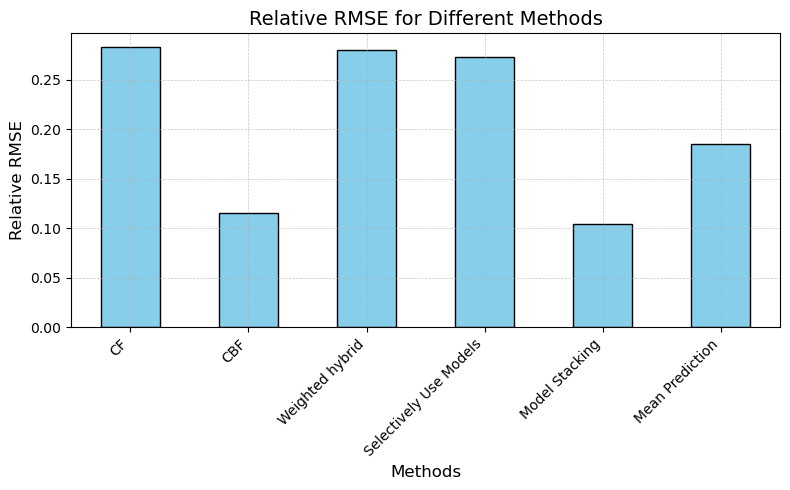

In [209]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the error metrics for each method
error_df[['Relative RMSE']].plot(kind='bar', legend=False, figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title('Relative RMSE for Different Methods', fontsize=14)
plt.ylabel('Relative RMSE', fontsize=12)
plt.xlabel('Methods', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

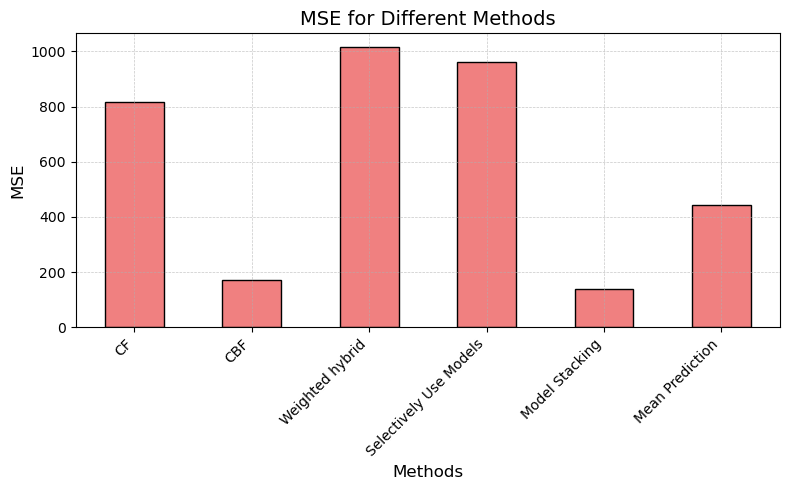

In [210]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the MSE metrics for each method
error_df[['MSE']].plot(kind='bar', legend=False, figsize=(8, 5), color='lightcoral', edgecolor='black')
plt.title('MSE for Different Methods', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.xlabel('Methods', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Below This Title is Testing Code 